# The $Q^2$ reconstruction

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]
overlay_scalings = dict()
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.91': {   '1mu-1p': 0.024262743077631366,
                                            'CC 1p 0pi': 0.024262743077631366,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.23209992756589928,
                                            'other pairs': 0.024262743077631366}}
applied cuts to overlay
applied cuts to data


## The $Q^2$ momentum reconstruction

In [6]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_vs_rec_CCIpOpi.pdf


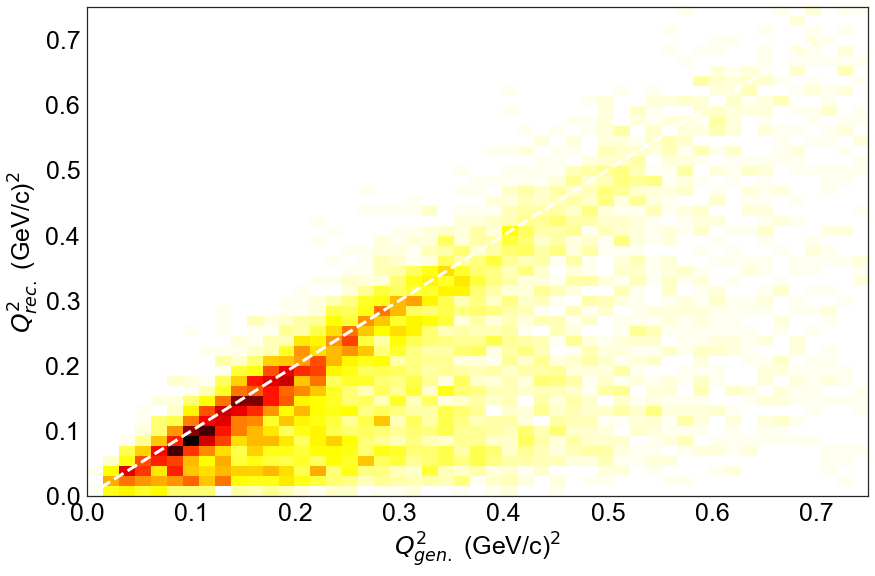

In [7]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2']
             ,bins=linspace(0.,0.75,50),ax=ax);
ax.plot([0.,0.75],[0.,0.75],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$',do_add_legend=True)
save_figure(figures_path+'Q2_gen_vs_rec_CCIpOpi.pdf')

mean,sigma: 0.094574664162 0.128882689629
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_CCIpOpi.pdf


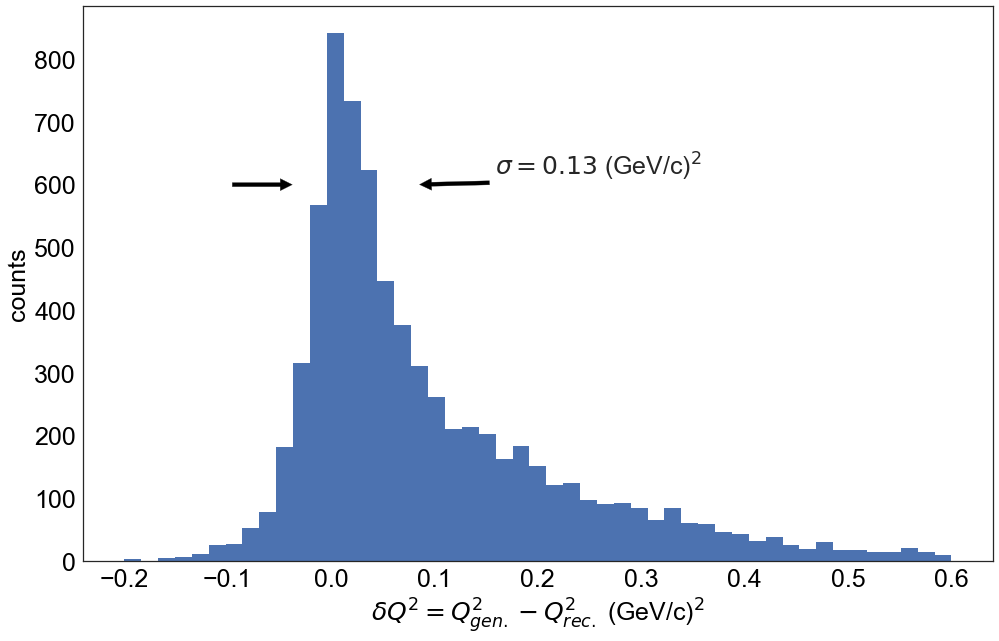

In [8]:
fig,ax=plt.subplots(figsize=(14,9))
delta = selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2']
truncated = selected_CC1p0pi[np.abs(delta)<0.6]
delta_truncated = truncated['truth_Q2'] - truncated['reco_Q2']
mean,sigma = np.mean(delta_truncated),np.std(delta_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(delta,bins=linspace(-0.2,0.6,50))
ax.annotate('',xy=(mean-sigma,600),xytext=(mean-1.5*sigma,600),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(r'$\sigma=%.2f$ (GeV/c)$^2$'%(sigma),xy=(mean-0.1*sigma,600),xytext=(mean+0.5*sigma,615),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\delta Q^2 = Q^2_{gen.}-Q^2_{rec.}$ (GeV/c)$^2$','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_CCIpOpi.pdf')

mean,sigma: 29.2945830265 34.4516428394
mean-sigma: -5.15705981298 mean-1.5*sigma: -22.3828812327
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_gen_rec_gen_CCIpOpi.pdf


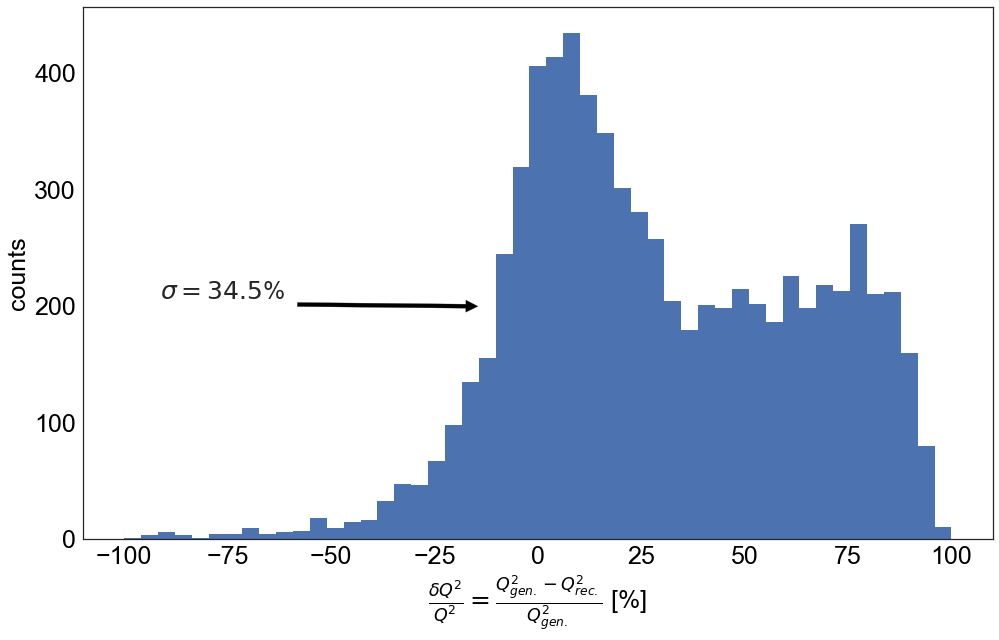

In [9]:
fig,ax=plt.subplots(figsize=(14,9))
R = 100*(selected_CC1p0pi['truth_Q2'] - selected_CC1p0pi['reco_Q2'])/selected_CC1p0pi['truth_Q2']
truncated = selected_CC1p0pi[np.abs(R)<100]
R_truncated = 100*(truncated['truth_Q2'] - truncated['reco_Q2'])/truncated['truth_Q2']
mean,sigma = np.mean(R_truncated),np.std(R_truncated)
print 'mean,sigma:',mean,sigma
plt.hist(R,bins=linspace(-100,100,50))
print 'mean-sigma:',(mean-sigma),'mean-1.5*sigma:',(mean-1.5*sigma)
ax.annotate((r'$\sigma=%.1f$'%(sigma)+'%'),xy=(mean-1.2*sigma,200),xytext=(mean-3.5*sigma,206),fontsize=25
            ,arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,r'$\frac{\delta Q^2}{Q^2} = \frac{Q^2_{gen.}-Q^2_{rec.}}{Q^2_{gen.}}$ [%]','counts')
plt.tight_layout()
save_figure(figures_path+'Q2_gen_rec_gen_CCIpOpi.pdf')

## The main reason for this impairment in the $Q^2$ reconstruction is the breakage of the muon tracks

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Pmu_gen_vs_rec_CCIpOpi.pdf


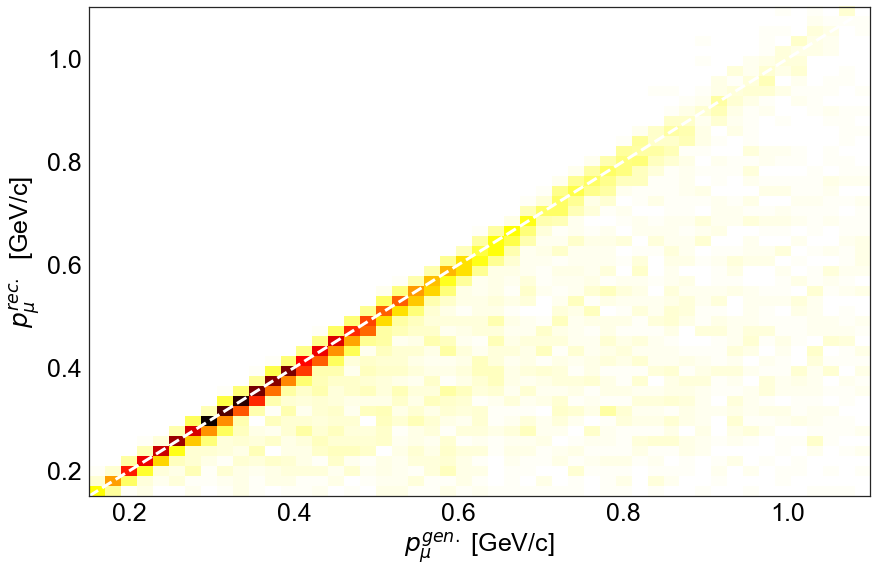

In [10]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Pmu'],selected_CC1p0pi['reco_Pmu']
             ,bins=linspace(0.15,1.1,50),ax=ax);
ax.plot([0.15,1.1],[0.15,1.1],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$p_{\mu}^{gen.}$ [GeV/c]',r'$p_{\mu}^{rec.}$  [GeV/c]',do_add_legend=True)
save_figure(figures_path+'Pmu_gen_vs_rec_CCIpOpi.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/l_muCandidate_gen_vs_rec_CCIpOpi.pdf


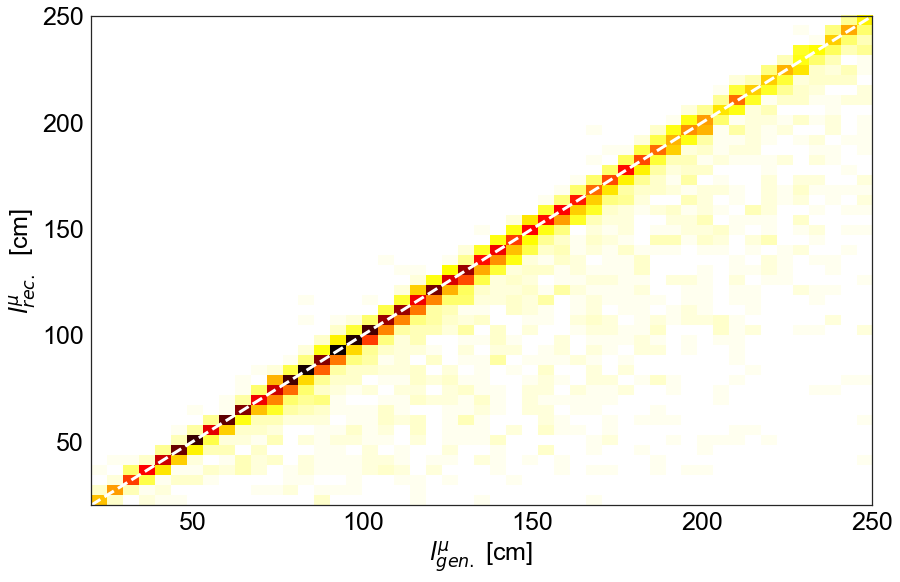

In [11]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_l_muCandidate'],selected_CC1p0pi['l_muCandidate']
             ,bins=linspace(20,250,50),ax=ax);
ax.plot([20,250],[20,250],'--',color='white',alpha=1,linewidth=3)
set_axes(ax,r'$l^{\mu}_{gen.}$ [cm]',r'$l^{\mu}_{rec.}$  [cm]',do_add_legend=True)
save_figure(figures_path+'l_muCandidate_gen_vs_rec_CCIpOpi.pdf')

# The $Q^2$ distribution in the selected CCQE-like events

In [12]:
var,x_label,bins='reco_Q2',r'$Q^{2}$ (GeV/c)$^2$',linspace(0.,1.0,11)
bin_width = 0.5*(bins[1]-bins[0])
xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width)

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_selected_events.pdf


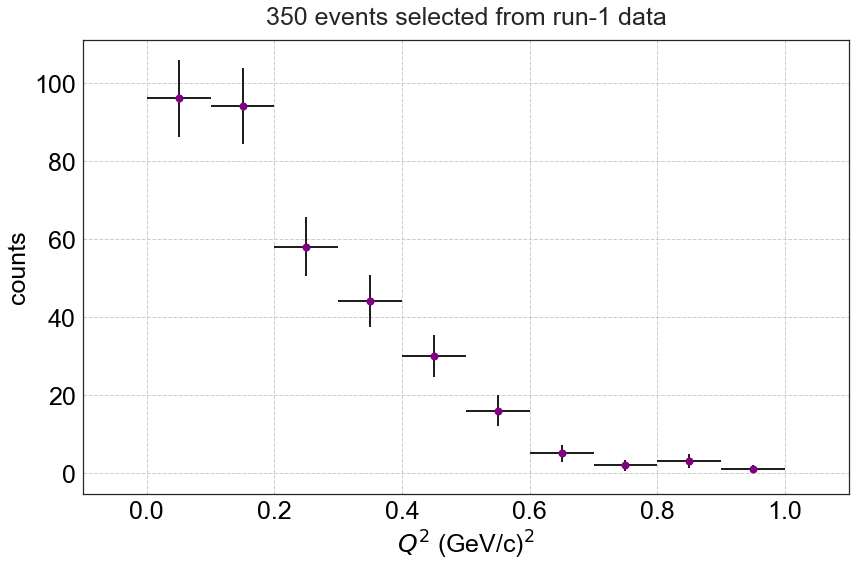

In [13]:
fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1)
plt.tight_layout()
save_figure(figures_path+'reco_Q2_selected_events.pdf')

## Correcting the measured proton momentum distribution for background impurities and signal inefficiencies

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_purity_after_cuts.pdf


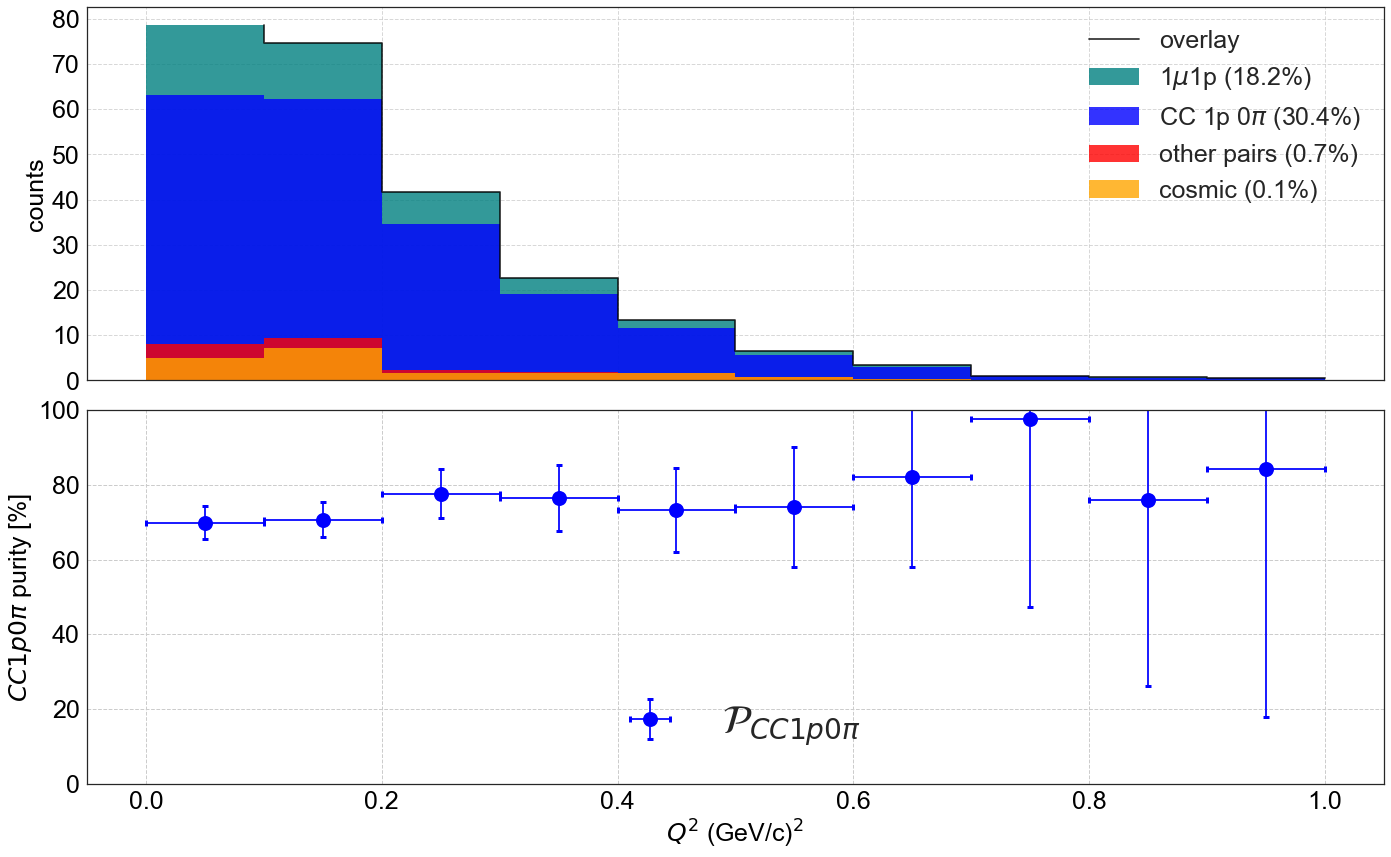

In [14]:
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                                 , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                                 , ax=ax, var=var, x_label='',y_label='counts', bins=bins 
                                 , remove_ticks_x=True
                                 , fontsize=25, stackColor='black',stackLabel='overlay'
                              );
ax.legend(fontsize=25)
ax = fig.add_subplot(2,1,2)
mid,purity,purity_err = plot_purity( OverlaySamples=selected_overlay,debug=0               
            , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                               
            , ax=ax, var=var, bins=bins 
            , purity_pair_type='CC 1p 0pi'            
            , x_label=x_label, y_label=r'$CC1p0\pi$ purity [%]'                            
            , color='blue', ecolor='blue',label=r'$\mathcal{P}_{CC 1p 0\pi}$'
           );
plt.legend(fontsize=40,loc='lower center')
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_purity_after_cuts.pdf')

# The $CC1p0\pi$ efficiency is taken from the entire sample of $CC1p0\pi$ events in the overlay

In [15]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'

926088  GENIE interaction


In [16]:
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π events in overlay'

243732 GENIE CC1p0π events
7304 selected CC1p0π events in overlay


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_efficiency_after_cuts.pdf


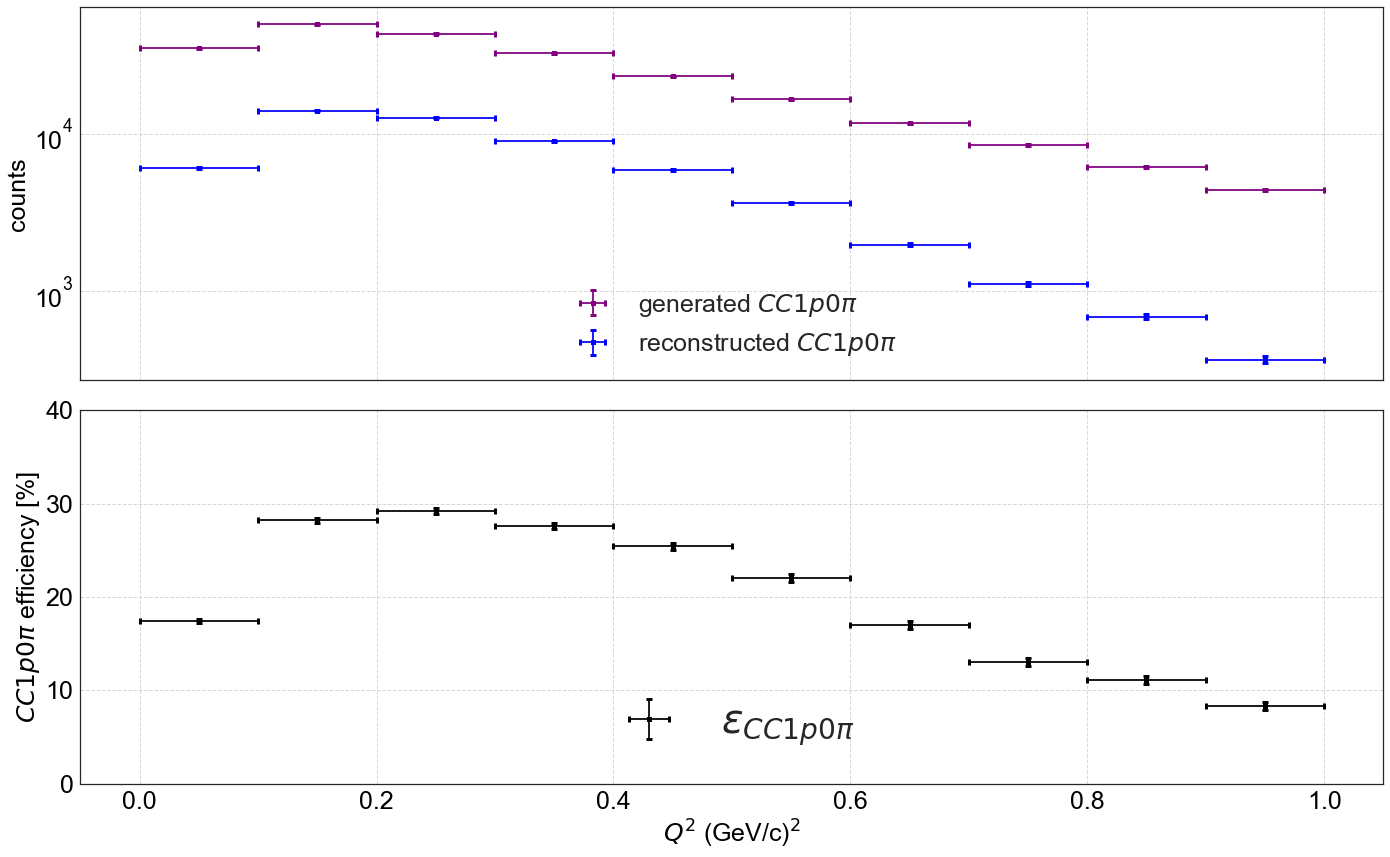

In [17]:
overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
fig=plt.figure(figsize=(19.416,12))
ax = fig.add_subplot(2,1,1)
h = dict()
for sam,sname,slabel,color in zip([GENIE_CC1p0pi,selected_CC1p0pi]
                                  ,['gen','rec']
                                  ,['generated $CC 1p 0\pi$','reconstructed $CC 1p 0\pi$']                               
                                  ,['purple','blue']):
    h[sname],edges = np.histogram(sam['truth_Q2'],bins=bins)
    if sname=='rec':
        h[sname] = h[sname]*overlay_scaling['N(Ovelay)/N(On)']
    mid = 0.5*(edges[1:]+edges[:-1])
    bin_width=0.5*(edges[1]-edges[0])
    plt.errorbar(x=mid,xerr=bin_width,y=h[sname],yerr=np.sqrt(h[sname]),color=color
                 ,markersize=5,fmt='s',capsize=3,capthick=3,label=slabel)
set_axes(ax, x_label='', y_label=r'counts',remove_ticks_x=True
         ,do_add_grid=True,do_add_legend=True,legend_loc='lower center')
ax.set_yscale('log')

eff = h['rec']/h['gen']
eff_err = eff * np.sqrt(1./h['rec'] + 1./h['gen'])

ax = fig.add_subplot(2,1,2)
plt.errorbar(x=mid , xerr=bin_width , y=100*eff , yerr=100*eff_err , color='black'
             ,markersize=5,fmt='s',capsize=3,capthick=3,label=r'$\epsilon_{CC 1p 0\pi}$')
set_axes(ax, x_label=x_label
         , y_label=r'$CC1p0\pi$ efficiency [%]',yticks=[0,10,20,30,40],do_add_grid=True)
plt.legend(fontsize=40,loc='lower center')
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_efficiency_after_cuts.pdf')

# The $CC1p0\pi$ correction is the purity/efficiency

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/Q2_correction_after_cuts.pdf


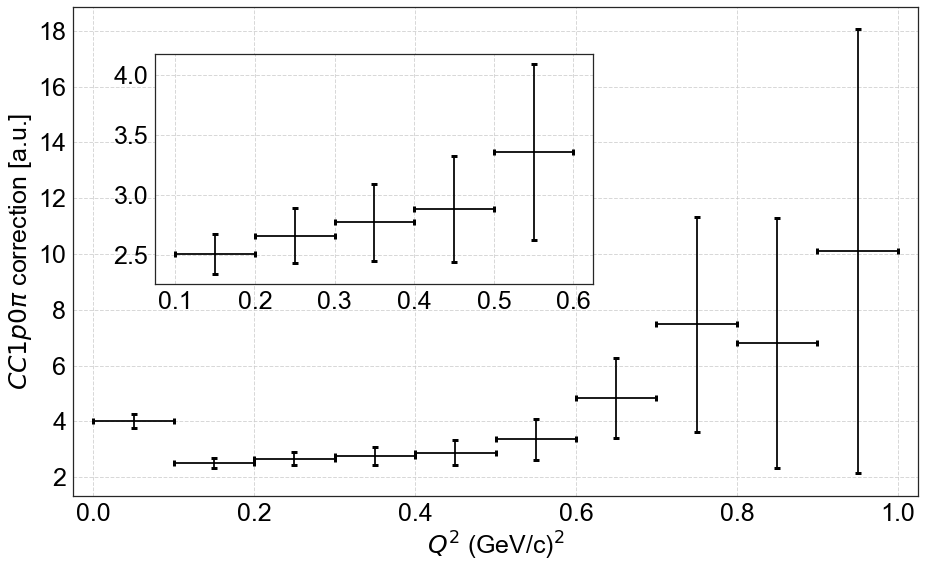

In [18]:
C = purity/eff
C_err = C * np.sqrt( np.square(purity_err/purity) + np.square(eff_err/eff))

fig=plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
plt.errorbar(x=mid , xerr=bin_width , y=C , yerr=C_err 
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(ax, x_label=x_label,xlim=xlim
         , y_label=r'$CC1p0\pi$ correction [a.u.]'
         ,do_add_grid=True,do_add_legend=True)

# location for the zoomed portion 
sub_axes = plt.axes([.17, .5, .47, .40]) 
# plot the zoomed portion
sub_axes.errorbar(x=mid[1:-4] , xerr=bin_width , y=C[1:-4] , yerr=C_err[1:-4]
             ,color='black'
             ,markersize=2,fmt='s',capsize=3,capthick=3)
set_axes(sub_axes, x_label='',do_add_grid=True,yticks=(2.5,3,3.5,4))
plt.tight_layout()
plt.subplots_adjust(hspace=0.08)
save_figure(figures_path+'Q2_correction_after_cuts.pdf')

## now apply the correction to the data

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_selected_events_corrected.pdf


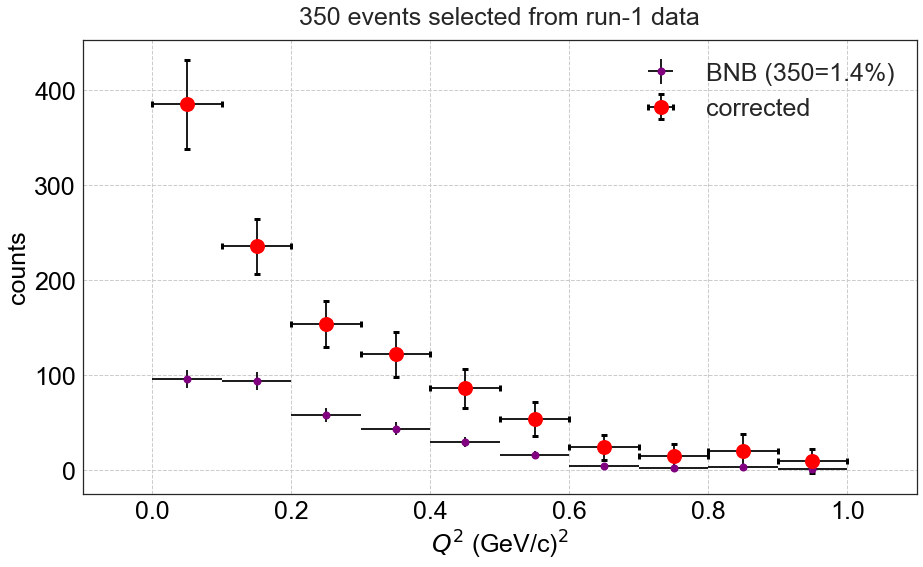

In [19]:
fig=plt.figure(figsize=(12.944,8))

ax=fig.add_subplot(1,1,1)
_,h_OnBeam = plot_OnBeam(OnBeamSample=selected_events,OnBeamFV=OnBeamFV,markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
h_OnBeam_corrected = h_OnBeam*C
h_OnBeam_corrected_err = np.sqrt(np.square(h_OnBeam*C_err)+ np.square(np.sqrt(h_OnBeam)*C))

plt.errorbar(x=mid , xerr=bin_width , y=h_OnBeam_corrected , yerr=h_OnBeam_corrected_err
             ,color='red',ecolor='black',label='corrected'
             ,markersize=15,fmt='o',capsize=3,capthick=3)
set_axes(ax,x_label,'counts',title='%d events selected from run-1 data'%len(selected_events),do_add_grid=True,alpha_grid=1,do_add_legend=True)
plt.tight_layout()
save_figure(figures_path+'reco_Q2_selected_events_corrected.pdf')

In [32]:
print C
print C_err

[  4.01057383   2.50786072   2.6601987    2.77078326   2.88053595
   3.35542067   4.83399679   7.47250165   6.82067251  10.09335241]
[ 0.26059144  0.16454988  0.22674976  0.32106254  0.43994241  0.73179496
  1.42777806  3.85774402  4.47951368  7.9593901 ]


# look for the distribution only two bins - to extract mA

In [36]:
Q2min_bins = [0.1,0.25]
Q2max_bins = [Q2min_bins[1],0.6]
# Q2min_bins = linspace(0,1,11)
# Q2max_bins = linspace(0.1,1.1,11)

In [37]:
Ntot=0
Q2var = 'reco_Q2'
overlay_scaling = overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
purity_pair_type='CC 1p 0pi'
debug=2

Q2_averages,Q2_stds = [],[]
h,RQ2 = dict(),dict()
Noverlay_bin = dict()

h['measured'],h['measured err'] = [],[]
h['corrected'],h['corrected err'] = [],[]
pur,pur_err = [],[]
eff,eff_err = [],[]
Corr,Corr_err = [],[]
for Q2min,Q2max in zip(Q2min_bins,Q2max_bins):    

    # measured 
    sam_bin = selected_events[(selected_events[Q2var]>Q2min)&(selected_events[Q2var]<Q2max)]
    N_bin = float(len(sam_bin))
    N_bin_err = np.sqrt(N_bin)
    Ntot += N_bin
    
    Q2_averages.append( np.mean(sam_bin[Q2var]) )
    Q2_stds.append( np.std(sam_bin[Q2var]) )
    
    h['measured'].append( N_bin )
    h['measured err'].append( np.sqrt( N_bin ) )       
    
    # purity 
    for i_pair_type,pair_type in enumerate(pair_types):
        overlay_sam = selected_overlay[pair_type]
        Noverlay_bin[pair_type] = len(overlay_sam[(overlay_sam[Q2var]>Q2min)&(overlay_sam[Q2var]<Q2max)])
        Noverlay_bin[pair_type+' scaled'] = overlay_scaling[pair_type]*Noverlay_bin[pair_type]
    num = Noverlay_bin[purity_pair_type+' scaled']*overlay_scaling['N(Ovelay)/N(On)']
    den = (Noverlay_bin['1mu-1p scaled']+Noverlay_bin['other pairs scaled']+Noverlay_bin['cosmic scaled'])*overlay_scaling['N(Ovelay)/N(On)']
    pur_bin = num/den
    pur_err_bin = pur_bin*np.sqrt((1./num if num>0.5 else 0) + (1./den if den>0.5 else 0))
    pur.append(pur_bin)
    pur_err.append(pur_err_bin)

    
    # efficiency
    GENIE_CC1p0pi_bin = GENIE_CC1p0pi[(GENIE_CC1p0pi['truth_Q2']>Q2min)&(GENIE_CC1p0pi['truth_Q2']<Q2max)]
    selected_CC1p0pi_bin = selected_CC1p0pi[(selected_CC1p0pi['truth_Q2']>Q2min)&(selected_CC1p0pi['truth_Q2']<Q2max)]
    num = float(len(selected_CC1p0pi_bin))*overlay_scaling['N(Ovelay)/N(On)']
    den = float(len(GENIE_CC1p0pi_bin))
    eff_bin = num/den
    eff_err_bin = eff_bin*np.sqrt((1./num if num>0.5 else 0) + (1./den if den>0.5 else 0))
    eff.append(eff_bin)
    eff_err.append(eff_err_bin)

    
    # correction
    Corr_bin = pur_bin/eff_bin if eff_bin>0.01 else pur_bin/0.01
    Corr_err_bin = Corr_bin*np.sqrt( np.square(pur_err_bin/pur_bin if pur_bin>0.01 else 0) + np.square(eff_err_bin/eff_bin if eff_bin>0.01 else 0))
    Corr.append(Corr_bin)
    Corr_err.append(Corr_err_bin)

    NCorr_bin = N_bin*Corr_bin
    NCorr_err_bin = np.sqrt(np.square(N_bin*Corr_err_bin)+ np.square(np.sqrt(N_bin)*Corr_bin))
    h['corrected'].append( NCorr_bin )
    h['corrected err'].append( NCorr_err_bin )

if debug:
    pp.pprint(h)
    print Corr
    print Corr_err

{   'corrected': [312.7376742091786, 340.898875056566],
    'corrected err': [33.126768352418011, 39.748054507456381],
    'measured': [125.0, 117.0],
    'measured err': [11.180339887498949, 10.816653826391969]}
[2.5019013936734287, 2.9136655987740685]
[0.14197328391308164, 0.20701456585973343]


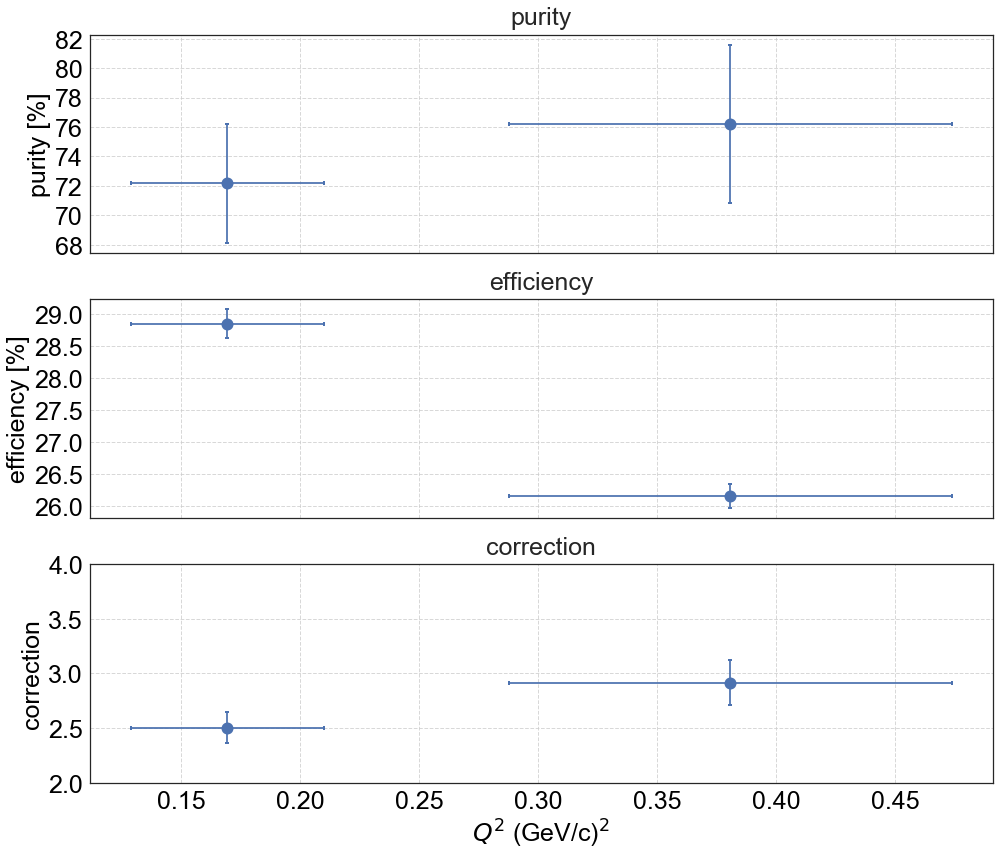

In [38]:
    
fig=plt.figure(figsize=(14,12))
ax=fig.add_subplot(3,1,1)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = 100*np.array(pur), yerr = 100*np.array(pur_err)
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,'','purity [%]',title='purity',do_add_grid=True,remove_ticks_x=True)

ax=fig.add_subplot(3,1,2)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = 100*np.array(eff), yerr = 100*np.array(eff_err)
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,'','efficiency [%]',title='efficiency',do_add_grid=True,remove_ticks_x=True)

ax=fig.add_subplot(3,1,3)
plt.errorbar( x = Q2_averages, xerr = Q2_stds ,y = Corr, yerr = Corr_err
             ,fmt='o',markersize=12,capsize=2,capthick=2)
set_axes(ax,x_label,'correction',title='correction',do_add_grid=True,yticks=(2,2.5,3,3.5,4))

plt.tight_layout()

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/reco_Q2_twobins.pdf


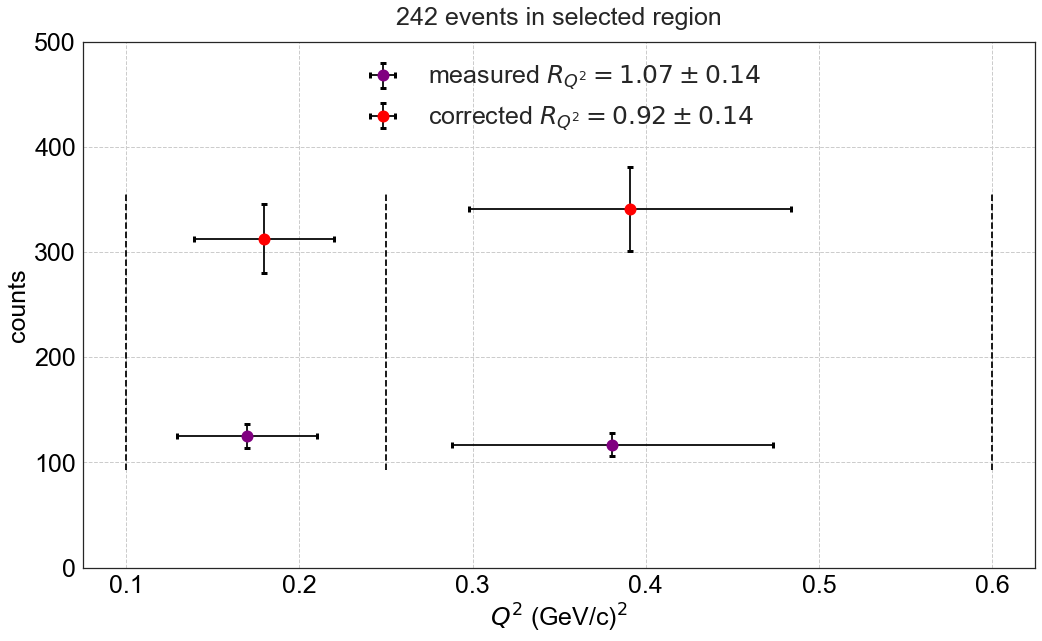

In [39]:
fig=plt.figure(figsize=(14.592,9))
ax=fig.add_subplot(1,1,1)
for itype,(Rtype,color) in enumerate(zip(['measured','corrected']
                                     ,['purple','red'])):
    RQ2[Rtype] = h[Rtype][0]/h[Rtype][1]
    RQ2[Rtype+' err'] = RQ2[Rtype]*np.sqrt(np.square(h[Rtype+' err'][0]/h[Rtype][0]) + np.square(h[Rtype+' err'][1]/h[Rtype][1]))
    plt.errorbar( x = Q2_averages+0.01*itype*np.ones(len(Q2_averages)), xerr = Q2_stds
             ,y = h[Rtype], yerr = h[Rtype+' err']
                 ,color=color,ecolor='black'
             ,fmt='o',markersize=12,capsize=3,capthick=3
             ,label=Rtype+' $R_{Q^2}=%.2f\pm%.2f$'%(RQ2[Rtype],RQ2[Rtype+' err']))
    
# depict the low/high bins boundaries
plt.plot([Q2min_bins[0],Q2min_bins[0]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2min_bins[1],Q2min_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--'
         ,[Q2max_bins[1],Q2max_bins[1]],[np.min(ax.get_ylim()),0.9*np.max(ax.get_ylim())],'--',color='black')

set_axes(ax,x_label,'counts',title='%d events in selected region'%Ntot
         ,do_add_grid=True,alpha_grid=1,do_add_legend=True,legend_loc='upper center',ylim=(0,500))
plt.tight_layout()
save_figure(figures_path+'reco_Q2_twobins.pdf')